# Energy Portfolio Analysis and Optimization
I will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. 
Please see the parameters for each of the portfolio's below:

1. Import one year of data for four stocks using historical data from Yahoo Finance
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
tickers = ['XOM', 'CVX', 'BP', 'SHEL']
df = yf.download(tickers, '2023-3-3', '2024-3-2', rounding=True)['Adj Close']
df.head()

[*********************100%***********************]  4 of 4 completed


,BP,CVX,SHEL,XOM
Date,,,,
2023-03-03,38.36,158.40,59.23,108.04
2023-03-06,38.55,159.56,59.48,108.99
2023-03-07,37.96,157.51,58.56,106.89
2023-03-08,37.82,156.51,58.34,105.33
2023-03-09,37.52,154.13,57.67,104.51


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-03-03 to 2024-03-01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BP      251 non-null    float64
 1   CVX     251 non-null    float64
 2   SHEL    251 non-null    float64
 3   XOM     251 non-null    float64
dtypes: float64(4)
memory usage: 9.8 KB


In [4]:
first_adj_close = df.div(df.iloc[0])
first_adj_close = first_adj_close.rename(columns= {'BP':'Normalized BP', 'CVX':'Normalized CVX', 'SHEL':'Normalized SHEL', 'XOM':'Normalized XOM'})
first_adj_close.head()



,Normalized BP,Normalized CVX,Normalized SHEL,Normalized XOM
Date,,,,
2023-03-03,1.000000,1.000000,1.000000,1.000000
2023-03-06,1.004953,1.007323,1.004221,1.008793
2023-03-07,0.989572,0.994381,0.988688,0.989356
2023-03-08,0.985923,0.988068,0.984974,0.974917
2023-03-09,0.978102,0.973043,0.973662,0.967327


In [5]:
big_df = pd.concat([df, first_adj_close], axis=1) # combine dataframes into 1 dataframe for comparison
big_df

,BP,CVX,SHEL,XOM,Normalized BP,Normalized CVX,Normalized SHEL,Normalized XOM
Date,,,,,,,,
2023-03-03,38.36,158.40,59.23,108.04,1.000000,1.000000,1.000000,1.000000
2023-03-06,38.55,159.56,59.48,108.99,1.004953,1.007323,1.004221,1.008793
2023-03-07,37.96,157.51,58.56,106.89,0.989572,0.994381,0.988688,0.989356
2023-03-08,37.82,156.51,58.34,105.33,0.985923,0.988068,0.984974,0.974917
2023-03-09,37.52,154.13,57.67,104.51,0.978102,0.973043,0.973662,0.967327
...,...,...,...,...,...,...,...,...
2024-02-26,35.32,154.45,62.79,103.41,0.920751,0.975063,1.060105,0.957146
2024-02-27,35.42,152.16,62.80,103.19,0.923358,0.960606,1.060274,0.955109
2024-02-28,34.96,152.34,61.99,103.48,0.911366,0.961742,1.046598,0.957793


In [6]:
x = len(tickers) # Dynamically count the number of stocks to allocate the cash between

big_df['Allocation BP'] = big_df['Normalized BP'] / x * 10000
big_df['Allocation CVX'] = big_df['Normalized CVX'] / x * 10000
big_df['Allocation SHEL'] = big_df['Normalized SHEL'] / x * 10000
big_df['Allocation XOM'] = big_df['Normalized XOM'] / x * 10000
big_df.head()

,BP,CVX,SHEL,XOM,Normalized BP,Normalized CVX,Normalized SHEL,Normalized XOM,Allocation BP,Allocation CVX,Allocation SHEL,Allocation XOM
Date,,,,,,,,,,,,
2023-03-03,38.36,158.40,59.23,108.04,1.000000,1.000000,1.000000,1.000000,2500.000000,2500.000000,2500.000000,2500.000000
2023-03-06,38.55,159.56,59.48,108.99,1.004953,1.007323,1.004221,1.008793,2512.382690,2518.308081,2510.552085,2521.982599
2023-03-07,37.96,157.51,58.56,106.89,0.989572,0.994381,0.988688,0.989356,2473.931178,2485.953283,2471.720412,2473.389485
2023-03-08,37.82,156.51,58.34,105.33,0.985923,0.988068,0.984974,0.974917,2464.807091,2470.170455,2462.434577,2437.291744
2023-03-09,37.52,154.13,57.67,104.51,0.978102,0.973043,0.973662,0.967327,2445.255474,2432.607323,2434.154989,2418.317290


In [7]:
# Separate the values we need for the chart into a new dataframe 

position_values = big_df.loc[:,['Allocation BP', 'Allocation CVX', 'Allocation SHEL', 'Allocation XOM']]
position_values.head()

,Allocation BP,Allocation CVX,Allocation SHEL,Allocation XOM
Date,,,,
2023-03-03,2500.000000,2500.000000,2500.000000,2500.000000
2023-03-06,2512.382690,2518.308081,2510.552085,2521.982599
2023-03-07,2473.931178,2485.953283,2471.720412,2473.389485
2023-03-08,2464.807091,2470.170455,2462.434577,2437.291744
2023-03-09,2445.255474,2432.607323,2434.154989,2418.317290


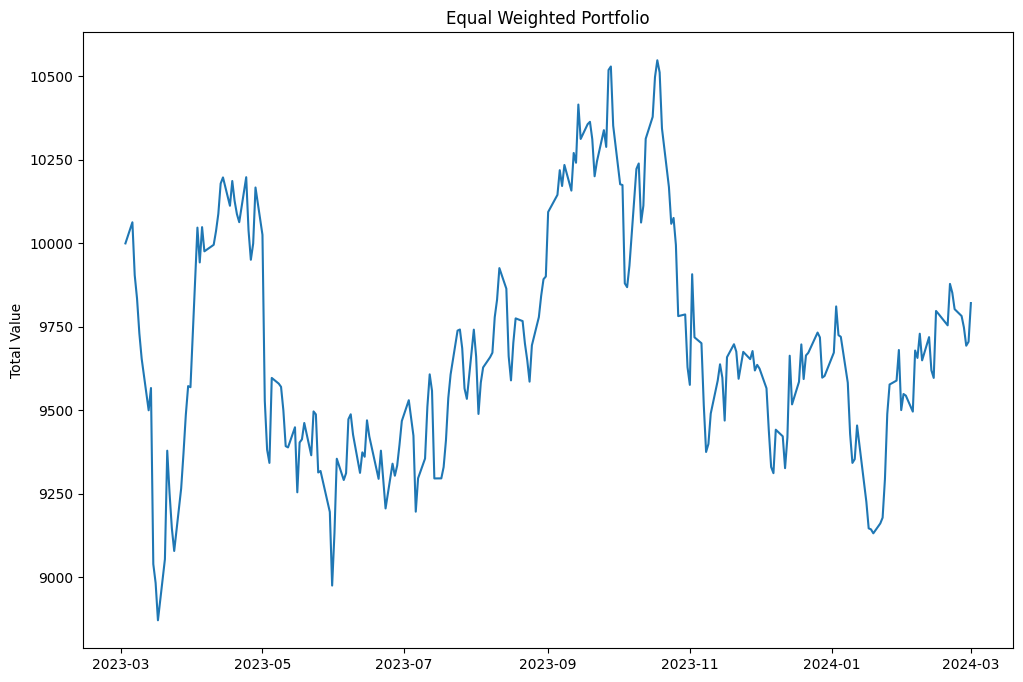

In [8]:
# Create a totals column
df_cols = ['Allocation BP', 'Allocation CVX', 'Allocation SHEL', 'Allocation XOM']

position_values['Total'] = position_values[df_cols].sum(axis=1)
position_values.head()

plt.figure(figsize=(12,8))
plt.plot(position_values['Total'])

plt.title('Equal Weighted Portfolio')
plt.ylabel('Total Value');

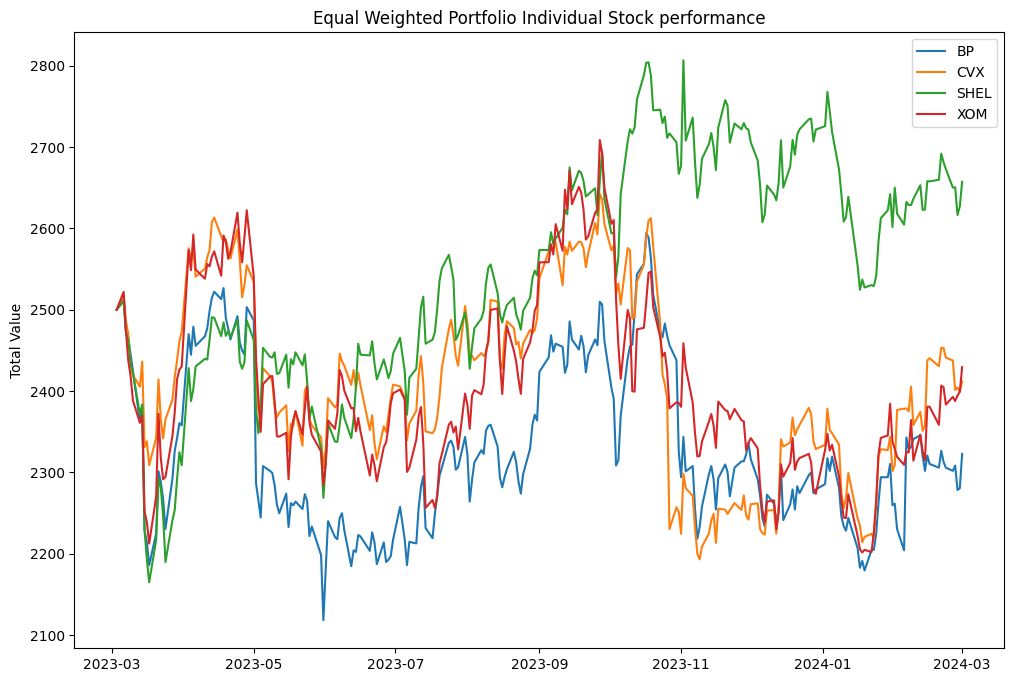

In [9]:
# View the 4 stocks in the portfolio

plt.figure(figsize=(12,8))
plt.plot(position_values.iloc[:,0:4], label=['BP','CVX','SHEL','XOM'])

plt.title('Equal Weighted Portfolio Individual Stock performance')
plt.ylabel('Total Value') 
plt.legend();

## Calculate Performance Metrics for the Portfolio
Now that I have created and visualized the equal-weighted portfolio, I will calculate a few metrics to measure the performance of the portfolio. Here are the five performance metrics:

 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [10]:
# Define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

In [11]:
# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return *100,2)),'%')

-1.79 %


In [12]:
# Create a 'Daily Returns' column
position_values['Daily Returns'] = position_values['Total'].pct_change()

position_values.head()

,Allocation BP,Allocation CVX,Allocation SHEL,Allocation XOM,Total,Daily Returns
Date,,,,,,
2023-03-03,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,NaN
2023-03-06,2512.382690,2518.308081,2510.552085,2521.982599,10063.225455,0.006323
2023-03-07,2473.931178,2485.953283,2471.720412,2473.389485,9904.994358,-0.015724
2023-03-08,2464.807091,2470.170455,2462.434577,2437.291744,9834.703866,-0.007096
2023-03-09,2445.255474,2432.607323,2434.154989,2418.317290,9730.335077,-0.010612


In [13]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Returns'].mean()

print('The mean daily return is ', mean_daily_return)

The mean daily return is  9.224603571267308e-06


In [14]:
# Calculate the standard deviation of Daily Return
std_daily_return = position_values['Daily Returns'].std()

print('The standard deviation of daily returns is ', std_daily_return)

The standard deviation of daily returns is  0.012768321090211665


### Sharpe Ratio
I'll use the sharpe ratio to quantify how much return we are getting for a given level of risk. The goal is to find the investment that will have higher returns than the benchmark or have the same return with less risk than the benchmark. 

It is calculated by the average return of the portfolio minus the risk free rate (I will use the 10-year Treasury Bond assuming a 10 year holding period for the portfolio), divided by the standard deviation of the return. 

In [15]:
# Calculate the sharpe ratio
sharpe_ratio = mean_daily_return / std_daily_return

sharpe_ratio

0.0007224601814203271

In [16]:
# Calculate the annualized sharpe ratio ** 251 days in our dataset 
sharpe_ratio_annualized = sharpe_ratio * 251**0.5

sharpe_ratio_annualized

print('The Sharpe Ratio Annualized is ', sharpe_ratio_annualized)

The Sharpe Ratio Annualized is  0.011445921856635701


In [17]:
# Create df_returns DataFrame to see the day over day change in stock value
df_returns = df.pct_change()
df_returns

,BP,CVX,SHEL,XOM
Date,,,,
2023-03-03,NaN,NaN,NaN,NaN
2023-03-06,0.004953,0.007323,0.004221,0.008793
2023-03-07,-0.015305,-0.012848,-0.015467,-0.019268
2023-03-08,-0.003688,-0.006349,-0.003757,-0.014594
2023-03-09,-0.007932,-0.015207,-0.011484,-0.007785
...,...,...,...,...
2024-02-26,-0.001696,-0.001358,-0.008527,0.003981
2024-02-27,0.002831,-0.014827,0.000159,-0.002127
2024-02-28,-0.012987,0.001183,-0.012898,0.002810


## Build & Run 10,000 Portfolio Scenarios
Now that the data is prepared, I will create and run the scenarios. First, I'll build the structures required to generate these scenarios and store the output. To do this, I will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After running the scenarios, replace these zeros with the corresponding output. The arrays are created with zeros first to give our arrays the correct shape before replacing them with the correct values.

Four different arrays to create:

 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [18]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(df_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [19]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

import random
random.seed(3)
np.random.seed(3)

In [20]:
for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario 251 days in our dataset
    returns_array[index] = np.sum(df_returns.mean()*251*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(df_returns.cov()*251, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [21]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [22]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: -0.02244688388548493


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [23]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

0.3502933855259271

In [24]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

1252

In [25]:
# Print the optimal weights for each stock
print(tickers)
print(weights_array[index_max_sharpe,:])

['XOM', 'CVX', 'BP', 'SHEL']
[0.01969199 0.01438289 0.88220878 0.08371633]


In [26]:
# Print the optimal weights for each stock
print(tickers)
print(weights_array[index_max_sharpe,:])

['XOM', 'CVX', 'BP', 'SHEL']
[0.01969199 0.01438289 0.88220878 0.08371633]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize the portfolio scenarios by using a scatter chart. I will use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, let's visualize where the optimal portfolio appears among all of the scenarios.

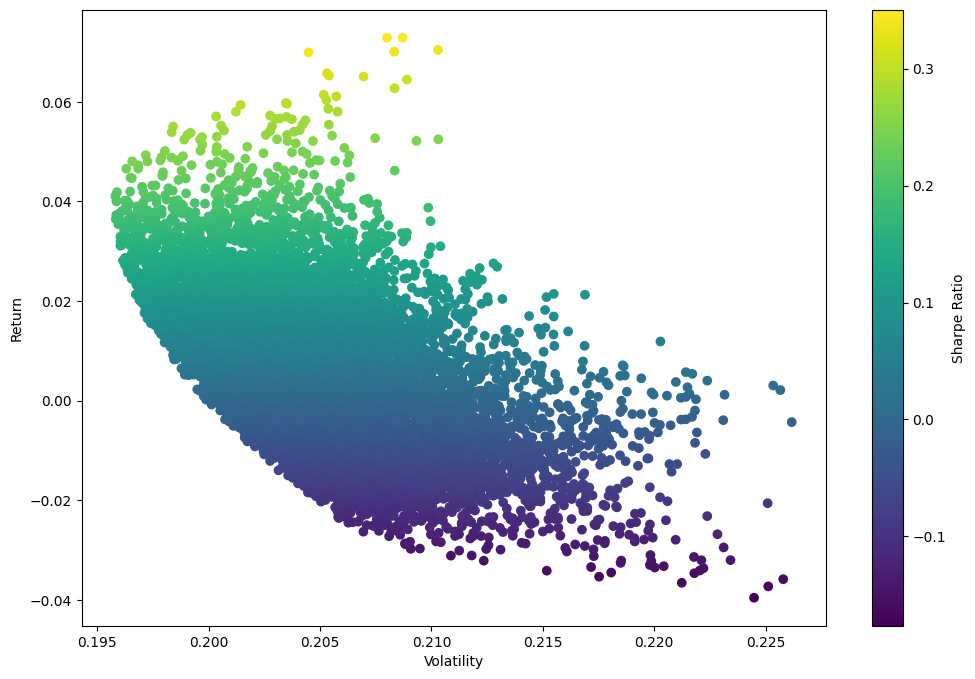

In [27]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

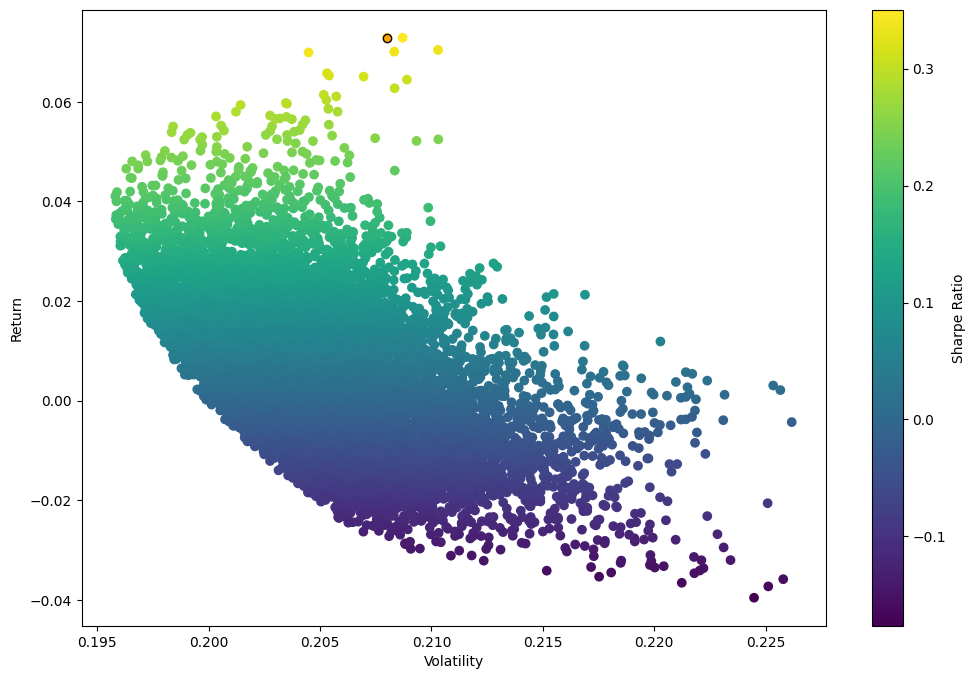

In [28]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');